<a href="https://colab.research.google.com/github/chrissaba3/COVID-19-NN/blob/main/Covid_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import io
import pandas as pd
from google.colab import drive
from google.colab import files
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source

uploaded = files.upload()
drive.mount('/content/drive')





Saving covid_formated_final.csv to covid_formated_final (1).csv
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
original = pd.read_csv(io.BytesIO(uploaded['covid_formated_final.csv']))
print(original)

           id  sex  age  pregnancy  ...  icu  intubed  patient_type  deceased
0      16169f    2   27         97  ...   97       97             1         0
1      1009bf    2   24         97  ...   97       97             1         0
2      167386    1   54          2  ...    2        2             2         0
3      0b5948    2   30         97  ...    2        2             2         0
4      0d01b5    1   60          2  ...    2        2             2         1
...       ...  ...  ...        ...  ...  ...      ...           ...       ...
10759  0058c2    1   38          2  ...   97       97             1         0
10760  08220d    1   29          2  ...   97       97             1         0
10761  01e599    2   38         97  ...    1        1             2         1
10762  0bde20    1   47          2  ...   97       97             1         0
10763  018bca    1   39          2  ...   97       97             1         0

[10764 rows x 19 columns]


In [46]:
copy = original.copy()
print(copy)

for i in range(len(copy['intubed'])):
 if copy['intubed'][i] == 97:
   copy.loc[i,'intubed'] = 0


print(copy)

           id  sex  age  pregnancy  ...  icu  intubed  patient_type  deceased
0      16169f    2   27         97  ...   97       97             1         0
1      1009bf    2   24         97  ...   97       97             1         0
2      167386    1   54          2  ...    2        2             2         0
3      0b5948    2   30         97  ...    2        2             2         0
4      0d01b5    1   60          2  ...    2        2             2         1
...       ...  ...  ...        ...  ...  ...      ...           ...       ...
10759  0058c2    1   38          2  ...   97       97             1         0
10760  08220d    1   29          2  ...   97       97             1         0
10761  01e599    2   38         97  ...    1        1             2         1
10762  0bde20    1   47          2  ...   97       97             1         0
10763  018bca    1   39          2  ...   97       97             1         0

[10764 rows x 19 columns]
           id  sex  age  pregnancy  .

In [47]:
for i in range(len(copy['icu'])):
 if copy['icu'][i] == 97:
   copy.loc[i,'icu'] = 0

print(copy)

           id  sex  age  pregnancy  ...  icu  intubed  patient_type  deceased
0      16169f    2   27         97  ...    0        0             1         0
1      1009bf    2   24         97  ...    0        0             1         0
2      167386    1   54          2  ...    2        2             2         0
3      0b5948    2   30         97  ...    2        2             2         0
4      0d01b5    1   60          2  ...    2        2             2         1
...       ...  ...  ...        ...  ...  ...      ...           ...       ...
10759  0058c2    1   38          2  ...    0        0             1         0
10760  08220d    1   29          2  ...    0        0             1         0
10761  01e599    2   38         97  ...    1        1             2         1
10762  0bde20    1   47          2  ...    0        0             1         0
10763  018bca    1   39          2  ...    0        0             1         0

[10764 rows x 19 columns]


In [48]:
X = copy.iloc[:5000,1:14].copy()
for i in range(len(X['pregnancy'])):
 if X['pregnancy'][i] == 97:
   X.loc[i,'pregnancy'] = 0


print(X)


      sex  age  pregnancy  ...  obesity  renal_chronic  tobacco
0       2   27          0  ...        2              2        2
1       2   24          0  ...        2              2        2
2       1   54          2  ...        1              2        2
3       2   30          0  ...        2              2        2
4       1   60          2  ...        2              2        2
...   ...  ...        ...  ...      ...            ...      ...
4995    2   62          0  ...        2              2        2
4996    2   30          0  ...        2              2        2
4997    1   55          2  ...        1              2        2
4998    2   73          0  ...        2              2        2
4999    2   76          0  ...        2              2        2

[5000 rows x 13 columns]


In [49]:
Y =  copy.iloc[:5000,-1:]
print(Y)

      deceased
0            0
1            0
2            0
3            0
4            1
...        ...
4995         0
4996         0
4997         0
4998         1
4999         0

[5000 rows x 1 columns]


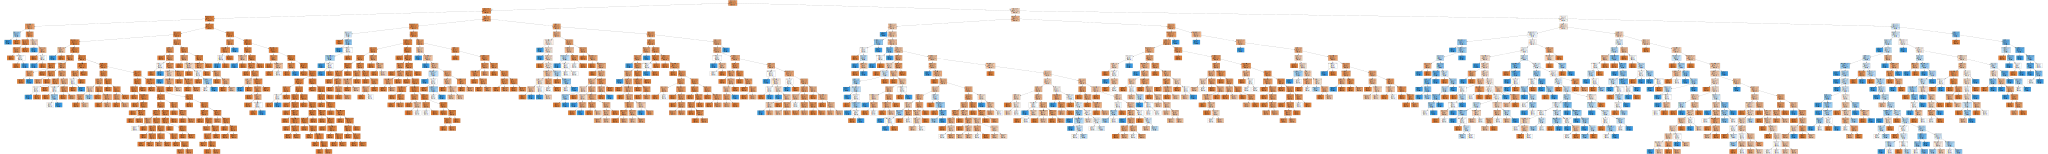

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz

X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size=0.2,
                                                 random_state = 42)

tree_classifier_gini = DecisionTreeClassifier(criterion='gini', max_depth=19)
tree_classifier_gini.fit(X_train,y_train)



export_graphviz(tree_classifier_gini,out_file=("covid_tree_gini.dot"),
                feature_names = ['sex','age','pregnancy','diabetes','copd','asthma','inmsupr','hypertension','other_diseaase','cardiovascular','obesity','renal_chronic','tobacco'],
                class_names=['recovered','deceased'],
                filled = True)


Source.from_file("covid_tree_gini.dot")

In [81]:
y_pred = tree_classifier_entropy.predict(X_test)
accuracy_score(y_test,y_pred)

0.811

In [52]:
print(X_train)

      sex  age  pregnancy  ...  obesity  renal_chronic  tobacco
4227    1   57          2  ...        1              2        1
4676    2   32          0  ...        1              2        2
800     1   59          2  ...        2              2        2
3671    2   90          0  ...        2              2        2
4193    1   65          2  ...        2              2        2
...   ...  ...        ...  ...      ...            ...      ...
4426    1   36          2  ...        2              2        2
466     1   40          2  ...        1              2        2
3092    1   39          2  ...        1              2        2
3772    2   45          0  ...        1              2        2
860     1   49          2  ...        2              2        1

[4000 rows x 13 columns]


In [53]:
classification_data = copy.copy()

classification_data['classes'] = classification_data['deceased']

print(classification_data)

           id  sex  age  pregnancy  ...  intubed  patient_type  deceased  classes
0      16169f    2   27         97  ...        0             1         0        0
1      1009bf    2   24         97  ...        0             1         0        0
2      167386    1   54          2  ...        2             2         0        0
3      0b5948    2   30         97  ...        2             2         0        0
4      0d01b5    1   60          2  ...        2             2         1        1
...       ...  ...  ...        ...  ...      ...           ...       ...      ...
10759  0058c2    1   38          2  ...        0             1         0        0
10760  08220d    1   29          2  ...        0             1         0        0
10761  01e599    2   38         97  ...        1             2         1        1
10762  0bde20    1   47          2  ...        0             1         0        0
10763  018bca    1   39          2  ...        0             1         0        0

[10764 rows x 2

In [54]:
for i in range(len(classification_data['classes'])):
 if classification_data['classes'][i] == 1:
   classification_data.loc[i,'classes'] = 'deceased'


for i in range(len(classification_data['classes'])):
 if classification_data['classes'][i] == 0:
   classification_data.loc[i,'classes'] = 'recovered'
print(classification_data)



           id  sex  age  pregnancy  ...  intubed  patient_type  deceased    classes
0      16169f    2   27         97  ...        0             1         0  recovered
1      1009bf    2   24         97  ...        0             1         0  recovered
2      167386    1   54          2  ...        2             2         0  recovered
3      0b5948    2   30         97  ...        2             2         0  recovered
4      0d01b5    1   60          2  ...        2             2         1   deceased
...       ...  ...  ...        ...  ...      ...           ...       ...        ...
10759  0058c2    1   38          2  ...        0             1         0  recovered
10760  08220d    1   29          2  ...        0             1         0  recovered
10761  01e599    2   38         97  ...        1             2         1   deceased
10762  0bde20    1   47          2  ...        0             1         0  recovered
10763  018bca    1   39          2  ...        0             1         0  re

In [55]:
X_classification = classification_data.iloc[:5000,1:14].copy()

print(X_classification)

      sex  age  pregnancy  ...  obesity  renal_chronic  tobacco
0       2   27         97  ...        2              2        2
1       2   24         97  ...        2              2        2
2       1   54          2  ...        1              2        2
3       2   30         97  ...        2              2        2
4       1   60          2  ...        2              2        2
...   ...  ...        ...  ...      ...            ...      ...
4995    2   62         97  ...        2              2        2
4996    2   30         97  ...        2              2        2
4997    1   55          2  ...        1              2        2
4998    2   73         97  ...        2              2        2
4999    2   76         97  ...        2              2        2

[5000 rows x 13 columns]


In [56]:
Y_classes =  classification_data.iloc[:5000,-1:]
Y_classes = pd.get_dummies(Y_classes)
print(Y_classes)

      classes_deceased  classes_recovered
0                    0                  1
1                    0                  1
2                    0                  1
3                    0                  1
4                    1                  0
...                ...                ...
4995                 0                  1
4996                 0                  1
4997                 0                  1
4998                 1                  0
4999                 0                  1

[5000 rows x 2 columns]


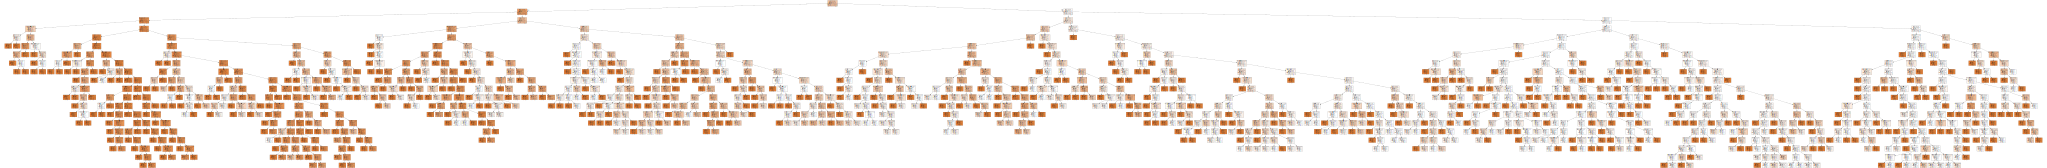

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz

X_train_,X_test,y_train,y_test = train_test_split(X_classification, Y_classes, test_size=0.2,
                                                 random_state = 42)

tree_classifier_gini = DecisionTreeClassifier(criterion='gini', max_depth=19)
tree_classifier_gini.fit(X_train,y_train)



export_graphviz(tree_classifier_gini,out_file=("covid_tree_gini.dot"),
                feature_names = ['sex','age','pregnancy','diabetes','copd','asthma','inmsupr','hypertension','other_diseaase','cardiovascular','obesity','renal_chronic','tobacco'],
                class_names=['recovered','deceased'],
                filled = True)


Source.from_file("covid_tree_gini.dot")

In [58]:
# Gini based tree
y_pred = tree_classifier_gini.predict(X_test)
accuracy_score(y_test,y_pred)


0.785

In [83]:
#Grid Search used to find optimal parameters, node depth and sample splits
best_params = {'max_leaf_nodes':list(range(2,100)),'min_samples_split':[2,3,4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), best_params, 
                              verbose=1, cv=3)

grid_search_cv.fit(X_train,y_train)
y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test,y_pred)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:    4.3s finished


0.827

In [60]:
# Best parameters
print(grid_search_cv.best_params_)

{'max_leaf_nodes': 7, 'min_samples_split': 2}


In [68]:
# Testing gini model with data made up of only deceased cases
count = 0
true_id = 0
index =[0] * 1259
for i in range(len(copy['deceased'])):
  if copy['deceased'][i] == 1:
    count += 1
    index[true_id] = i
    true_id += 1


features = ['sex','age','pregnancy','diabetes','copd','asthma','inmsupr','hypertension','other_diseaase','cardiovascular','obesity','renal_chronic','tobacco']
biased_target = classification_data['classes'][:1259]

biased_target = pd.get_dummies(biased_target)
biased_data = classification_data.iloc[:count,1:14]

for i in range(len(features)):
  for j in range(count):
    biased_data[features[i]][j] = classification_data[features[i]][index[j]]

for i in range(count):
  biased_target['deceased'][i] = 1
  biased_target['recovered'][i] = 0
print(biased_target)


      deceased  recovered
0            1          0
1            1          0
2            1          0
3            1          0
4            1          0
...        ...        ...
1254         1          0
1255         1          0
1256         1          0
1257         1          0
1258         1          0

[1259 rows x 2 columns]


In [84]:
# Basic Radnom forest with 100 trees
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

clf=RandomForestClassifier(n_estimators=1000)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

TypeError: ignored

In [78]:
#Importance of features according to the random forrest
feature_imp = pd.Series(clf.feature_importances_,index=['sex','age','pregnancy','diabetes','copd','asthma','inmsupr','hypertension','other_diseaase','cardiovascular','obesity','renal_chronic','tobacco']).sort_values(ascending=False)
feature_imp

age               0.695592
hypertension      0.052586
obesity           0.043856
diabetes          0.040308
other_diseaase    0.026621
tobacco           0.025534
renal_chronic     0.023714
cardiovascular    0.020552
copd              0.019065
inmsupr           0.014754
sex               0.014162
pregnancy         0.013180
asthma            0.010077
dtype: float64

In [79]:
# Forrest score using biased data
y_pred=clf.predict(biased_data)

print("Accuracy:",metrics.accuracy_score(biased_target, y_pred))

Accuracy: 0.35424940428911833


In [70]:
# Gini score on biased data
y_pred = tree_classifier_gini.predict(biased_data)
accuracy_score(biased_target,y_pred)


0.39555202541699763

In [ ]:
# Scikit-survival holds models meant to be used for medical predictions
!conda install -c sebp scikit-survival
%pip install scikit-survival

In [93]:
cox_file = files.upload()

Saving Cox_data_sample.csv to Cox_data_sample.csv


In [100]:
# cox_data = pd.read_csv(io.BytesIO(uploaded['Cox_data_sample.csv']))
# cox_data.head()


KeyError: ignored

In [89]:
from sksurv.linear_model import CoxPHSurvivalAnalysis
import matplotlib.pyplot as plt


estimators = CoxPHSurvivalAnalysis().fit(X_train,y_train);
surv_funcs = estimator.predict_survival_function(biased_data)

ValueError: ignored

In [ ]:
for fn in surv_funcs:
    plt.step(fn.x, fn(fn.x), where="post")

plt.ylim(0, 1)
plt.show()